# Audio Signal Representation

In [33]:
%matplotlib inline

import sklearn
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd
import scipy
from pathlib import Path
import seaborn as sns

In [3]:
manifest = pd.read_csv("./audio/gtzan/manifest.csv")
manifest.head()

genre                                          fname
0   pop  audio/gtzan/genres_original/pop/pop.00027.wav
1   pop  audio/gtzan/genres_original/pop/pop.00033.wav
2   pop  audio/gtzan/genres_original/pop/pop.00032.wav
3   pop  audio/gtzan/genres_original/pop/pop.00026.wav
4   pop  audio/gtzan/genres_original/pop/pop.00030.wav

### Load sample

In [27]:
genre = 'blues'
idx = 14 # [0, 99]
fin = manifest[manifest["genre"]==genre]["fname"].iloc[idx]
fname = Path(fin).stem
x, sr = librosa.load(fin)

print("file:", fname)
ipd.Audio(x, rate=sr)

file: blues.00052


### Explore signal in time and frequency domain

In [53]:
print(f"x sample: {x[:3]}")
print(f"x shape: {x.shape}")
print(f"x sample rate: {sr} [hz]")
print(f"x duration: {x.shape[0]//sr} [sec]")

x sample: [0.01705933 0.03436279 0.03353882]
x shape: (661794,)
x sample rate: 22050 [hz]
x duration: 30 [sec]


#### Time domain

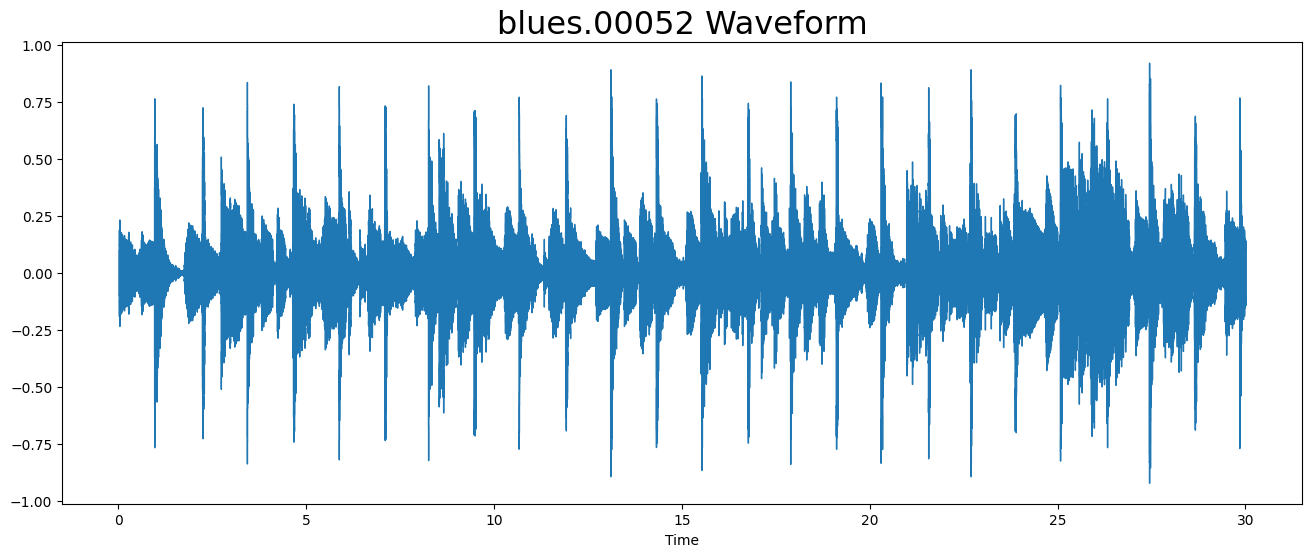

In [30]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=x, sr=sr)
plt.title(f"{fname} Waveform", fontsize = 23)
plt.show()

#### Frequency domain

##### STFT
Short-Time Fourier Transform (STFT) is a signal processing technique used to analyze signals in the time and frequency domain. It involves dividing a long signal into overlapping short segments and transforming each segment into the frequency domain using the Fourier Transform. This allows for a time-varying analysis of the frequency content of a signal, offering a better understanding of how the frequency components of the signal change over time. The STFT is widely used in areas such as speech processing, audio signal processing, and vibration analysis.

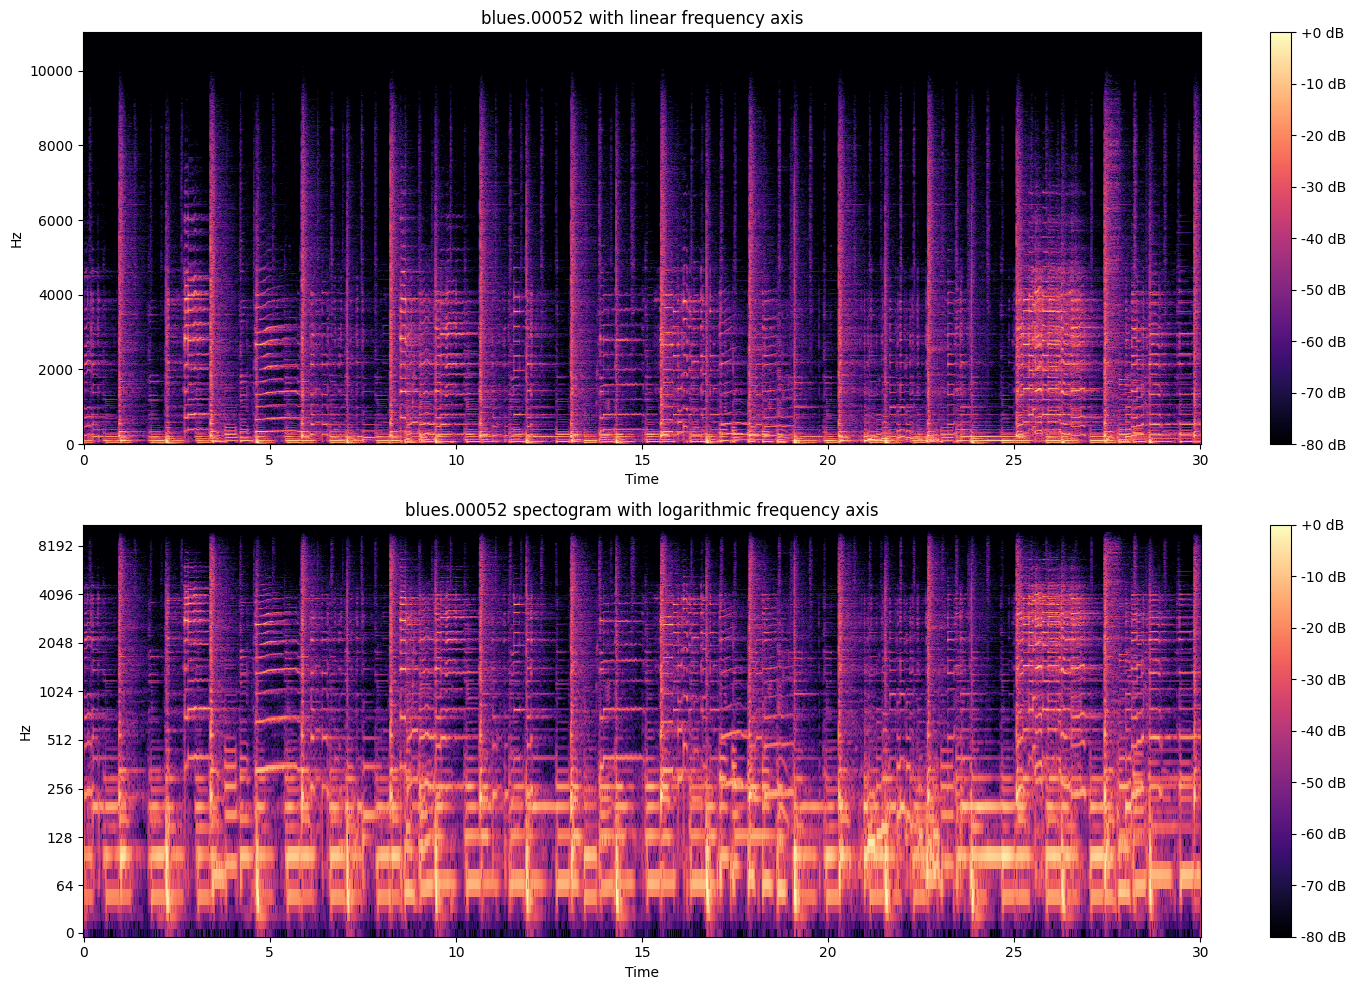

In [81]:
S = librosa.stft(x)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

fig, axs = plt.subplots(2, figsize=(15,10))

ax=axs[0]
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title=f"{fname} with linear frequency axis")
fig.colorbar(img, ax=ax, format="%+2.f dB")

ax=axs[1]
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title=f"{fname} spectogram with logarithmic frequency axis")
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.tight_layout()
plt.show()

##### Mel spectogram

The Log Mel Filterbank is a method for representing audio spectrogram that is based on the Mel scale, which approximates human perception of sound. The Mel scale is a logarithmic frequency representation that takes into account the fact that humans are more sensitive to some frequencies than others. By converting the frequency information into the Mel scale, the Log Mel Filterbank provides a representation that is more representative of human perception. This makes it a useful tool in audio processing applications where a human-centric representation is desired, such as speech recognition and music information retrieval.

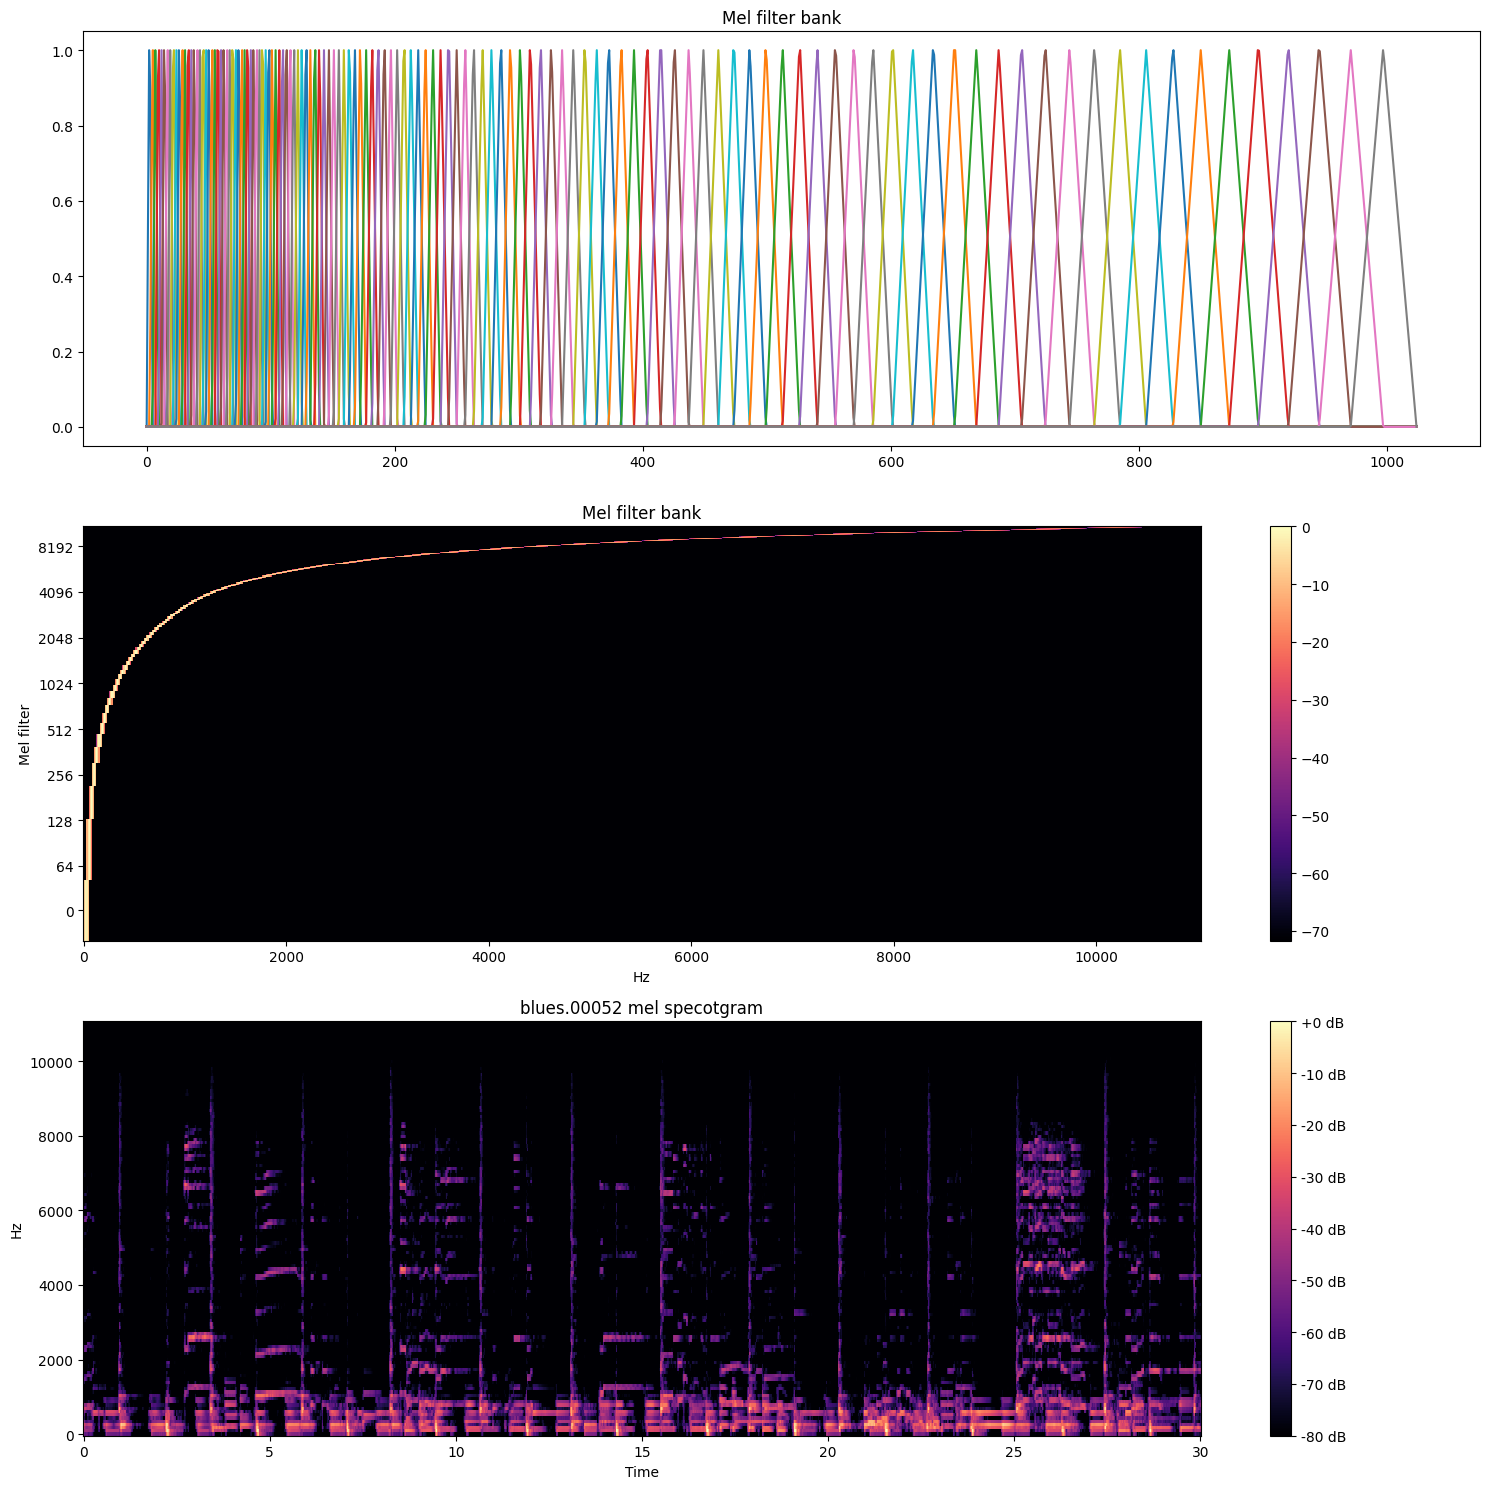

In [88]:
hop_length = 512
n_fft = 2048

melfb = librosa.filters.mel(sr=22050, n_fft=2048)
melfb_db = librosa.amplitude_to_db(np.abs(melfb), ref=np.max)


S = librosa.feature.melspectrogram(y=x, sr=sr, hop_length=hop_length, n_fft=n_fft)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

fig, axs = plt.subplots(3, figsize=(15,15))

ax = axs[0]
melfb /= np.max(melfb, axis=-1)[:, None]
ax.plot(melfb.T)
ax.set(title=f"Mel filter bank")

ax = axs[1]
img = librosa.display.specshow(melfb_db, x_axis='linear', y_axis='log', ax=ax, hop_length=hop_length)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)

ax = axs[2]
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, hop_length=hop_length)
ax.set(title=f"{fname} mel specotgram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.tight_layout()
plt.show()

##### MFCC
Mel-Frequency Cepstral Coefficients (MFCCs) are a set of features commonly used in speech and music processing. They are derived from the log Mel filterbank representation of an audio signal's spectrogram. MFCCs capture the spectral envelope of the signal and are designed to be similar to the human auditory system's response to sound. They are obtained by applying a discrete cosine transform to the log Mel filterbank coefficients and are widely used in applications such as speech recognition, speaker verification, and music genre classification. The resulting coefficients provide a compact and robust representation of the spectral information in an audio signal.

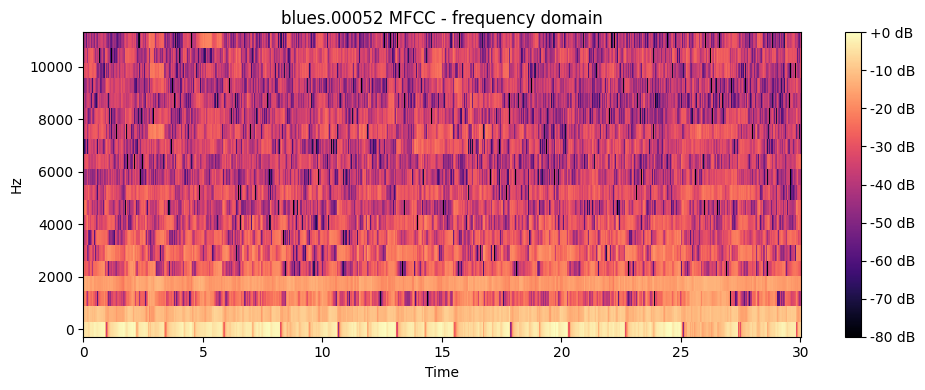

In [87]:
hop_length = 512
n_fft = 2048

S = librosa.feature.mfcc(y=x, sr=sr, hop_length=hop_length, n_fft=n_fft)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

fig, axs = plt.subplots(1, figsize=(10,4))

ax = axs
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, hop_length=hop_length)
ax.set(title=f"{fname} MFCC - frequency domain")
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.tight_layout()
plt.show()